In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.extend([
    'openml-python-OpenMLActiveClassificationTask/',
    'openml-scikit-activeml/',
    '../../openml-python-OpenMLActiveClassificationTask/',
    '../../openml-scikit-activeml/',
])

from openml import config, tasks, runs, flows
from openml_skactiveml import PoolSkactivemlModel
from skactiveml.classifier import ParzenWindowClassifier, MixtureModelClassifier, SklearnClassifier
from skactiveml.pool import RandomSampling, UncertaintySampling, ProbabilisticAL, GreedySamplingX
from sklearn.tree import DecisionTreeClassifier

config.start_using_configuration_for_example()

c:\Users\tpham\Desktop\Arbeit\openml-skactiveml\openml-python-OpenMLActiveClassificationTask\openml\config.py:184: UserWarning: Switching to the test server https://test.openml.org/api/v1/xml to not upload results to the live server. Using the test server may result in reduced performance of the API!
  warnings.warn(


In [2]:
# task_id = 1328
task_id = 1305
task = tasks.get_task(task_id)
task

OpenML Active Classification Task
Task Type Description: https://test.openml.org/tt/TaskType.ACTIVE_CLASSIFICATION
Task ID..............: 1305
Task URL.............: https://test.openml.org/t/1305
Estimation Procedure.: crossvalidation
Evaluation Measure...: predictive_accuracy
Target Feature.......: class
# of Classes.........: 3
Cost Matrix..........: Available

In [3]:
# model = PoolSkactivemlModel(
#     query_strategy=GreedySamplingX(missing_label=None),
#     prediction_model=ParzenWindowClassifier(missing_label=None, classes=task.class_labels, class_prior=0),
#     #selection_model_name="clf",
#     #selection_model=ParzenWindowClassifier(missing_label=None, classes=task.class_labels, class_prior=0),
#     budget=10000,
# )
# model = PoolSkactivemlModel(
#     query_strategy=RandomSampling(missing_label=None),
#     prediction_model=ParzenWindowClassifier(missing_label=None, classes=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], class_prior=0),
#     #selection_model_name="clf",
#     #selection_model=ParzenWindowClassifier(missing_label=None, classes=task.class_labels, class_prior=0),
#     budget=10000,
# )
# model = PoolSkactivemlModel(
#     query_strategy=RandomSampling(missing_label=None),
#     prediction_model=MixtureModelClassifier(missing_label=None, classes=None, class_prior=0),
#     #selection_model_name="clf",
#     #selection_model=ParzenWindowClassifier(missing_label=None, classes=task.class_labels, class_prior=0),
#     budget=10000,
# )
model = PoolSkactivemlModel(
    query_strategy=RandomSampling(missing_label=None),
    prediction_model=SklearnClassifier(estimator=DecisionTreeClassifier(), missing_label=None, classes=None),
    #selection_model_name="clf",
    #selection_model=ParzenWindowClassifier(missing_label=None, classes=task.class_labels, class_prior=0),
    budget=10000,
)

run = runs.run_model_on_task(
    model,
    task,
    upload_flow=False,
    avoid_duplicate_runs=False,
    n_jobs=-1,
    seed=0
)
run

openml==0.13.1.dev,
numpy>=1.17.3
scipy>=1.3.2
joblib>=1.1.1
threadpoolctl>=2.0.0
,openml==0.13.1.dev,skactiveml==0.4.0,
numpy>=1.17.3
scipy>=1.3.2
joblib>=1.1.1
threadpoolctl>=2.0.0
openml==0.13.1.dev,skactiveml==0.4.0,
numpy>=1.17.3
scipy>=1.3.2
joblib>=1.1.1
threadpoolctl>=2.0.0
,openml==0.13.1.dev,openml_skactiveml==0.0.1,skactiveml==0.4.0,
numpy>=1.17.3
scipy>=1.3.2
joblib>=1.1.1
threadpoolctl>=2.0.0


OpenML Run
Uploader Name: None
Metric.......: None
Run ID.......: None
Task ID......: 1305
Task Type....: None
Task URL.....: https://test.openml.org/t/1305
Flow ID......: None
Flow Name....: openml_skactiveml.extension.PoolSkactivemlModel(prediction_model=skactiveml.classifier._wrapper.SklearnClassifier(estimator=sklearn.tree._classes.DecisionTreeClassifier),query_strategy=skactiveml.pool._random_sampling.RandomSampling)
Flow URL.....: https://test.openml.org/f/None
Setup ID.....: None
Setup String.: Python_3.9.16. Sklearn_1.2.2. NumPy_1.24.3. SciPy_1.9.3.
Dataset ID...: 128
Dataset URL..: https://test.openml.org/d/128

In [4]:
run.publish()

openml==0.13.1.dev,
numpy>=1.17.3
scipy>=1.3.2
joblib>=1.1.1
threadpoolctl>=2.0.0
,openml==0.13.1.dev,skactiveml==0.4.0,
numpy>=1.17.3
scipy>=1.3.2
joblib>=1.1.1
threadpoolctl>=2.0.0
openml==0.13.1.dev,skactiveml==0.4.0,
numpy>=1.17.3
scipy>=1.3.2
joblib>=1.1.1
threadpoolctl>=2.0.0
openml==0.13.1.dev,
numpy>=1.17.3
scipy>=1.3.2
joblib>=1.1.1
threadpoolctl>=2.0.0


OpenML Run
Uploader Name: None
Metric.......: None
Run ID.......: 16
Run URL......: https://test.openml.org/r/16
Task ID......: 1305
Task Type....: None
Task URL.....: https://test.openml.org/t/1305
Flow ID......: 29
Flow Name....: openml_skactiveml.extension.PoolSkactivemlModel(prediction_model=skactiveml.classifier._wrapper.SklearnClassifier(estimator=sklearn.tree._classes.DecisionTreeClassifier),query_strategy=skactiveml.pool._random_sampling.RandomSampling)
Flow URL.....: https://test.openml.org/f/29
Setup ID.....: None
Setup String.: Python_3.9.16. Sklearn_1.2.2. NumPy_1.24.3. SciPy_1.9.3.
Dataset ID...: 128
Dataset URL..: https://test.openml.org/d/128

In [5]:
flow = flows.get_flow(run.flow_id)
print(flow)

OpenML Flow
Flow ID.........: 29 (version 1)
Flow URL........: https://test.openml.org/f/29
Flow Name.......: openml_skactiveml.extension.PoolSkactivemlModel(prediction_model=skactiveml.classifier._wrapper.SklearnClassifier(estimator=sklearn.tree._classes.DecisionTreeClassifier),query_strategy=skactiveml.pool._random_sampling.RandomSampling)
Flow Description: Pool Skactiveml Model

This class implements the model that is used for an active learning 
experiment. It consists of the query_strategy, a prediction model,
a selection model (if applicable), extra query parameters and the
budget.
Upload Date.....: 2023-10-16 13:47:08
Dependencies....: numpy>=1.17.3
scipy>=1.3.2
joblib>=1.1.1
threadpoolctl>=2.0.0


In [6]:
run = runs.get_run(run.run_id, ignore_cache=True)
print(run)

OpenML Run
Uploader Name...: Test Test
Uploader Profile: https://test.openml.org/u/3229
Metric..........: predictive_accuracy
Run ID..........: 16
Run URL.........: https://test.openml.org/r/16
Task ID.........: 1305
Task Type.......: Active Classification
Task URL........: https://test.openml.org/t/1305
Flow ID.........: 29
Flow Name.......: openml_skactiveml.extension.PoolSkactivemlModel(prediction_model=skactiveml.classifier._wrapper.SklearnClassifier(estimator=sklearn.tree._classes.DecisionTreeClassifier),query_strategy=skactiveml.pool._random_sampling.RandomSampling)(1)
Flow URL........: https://test.openml.org/f/29
Setup ID........: 12
Setup String....: Python_3.9.16. Sklearn_1.2.2. NumPy_1.24.3. SciPy_1.9.3.
Dataset ID......: 128
Dataset URL.....: https://test.openml.org/d/128


Index(['repeat', 'fold', 'cycle', 'budget', 'row_id', 'confidence.Iris-setosa',
       'confidence.Iris-versicolor', 'confidence.Iris-virginica', 'prediction',
       'correct'],
      dtype='object')


<ErrorbarContainer object of 3 artists>

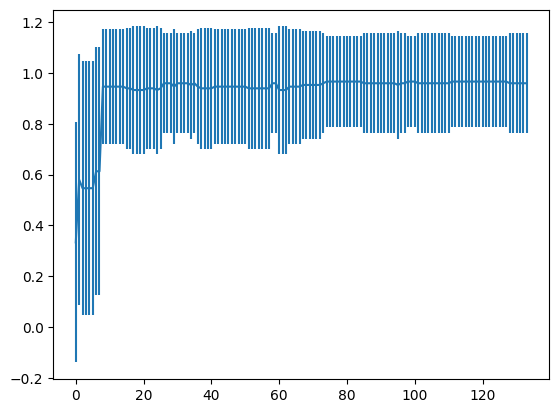

In [7]:
res = run.predictions
print(res.columns)
res["is_correct"] = res["prediction"] == res["correct"]
import matplotlib.pyplot as plt
import numpy as np
grouped_res = res.groupby(["cycle"])["is_correct"]
plt.errorbar(x=np.arange(len(grouped_res)), y=grouped_res.mean(), yerr=grouped_res.std())

In [13]:
# using sklearn flows together with skactiveml flows does not work yet
runs.run_flow_on_task(flows.get_flow(run.flow_id), task, avoid_duplicate_runs=False, upload_flow=False, n_jobs=-1)

ValueError: Only sklearn flows can be reinstantiated